In [1]:
import os
import numpy as np
import json
from matplotlib import pyplot as plt
import scipy as sp
import spectrum
from scipy.signal import welch
import scipy.stats as ss
import re
from tqdm import tqdm


In [5]:
path = "C:\\Users\\aless\\Desktop\\simu_transient\\spettri_noise_small_signal_analysis.npz"
data = np.load(path, allow_pickle = True)
data['step'].shape

(4000,)

In [2]:
path_pre = "C:\\Users\\aless\\Desktop\\simu_transient\\spettri_hamming_no_step\\simu_109_segment_2_hamming.npz"
path_post = "C:\\Users\\aless\\Desktop\\simu_transient\\spettri_hamming_step\\simu_109_segment_2_hamming.npz"

data_pre = np.load(path_pre, allow_pickle = True)
data_post = np.load(path_post, allow_pickle = True)

In [1]:
print(data_post['config'].item()['CIG'])

NameError: name 'data_post' is not defined

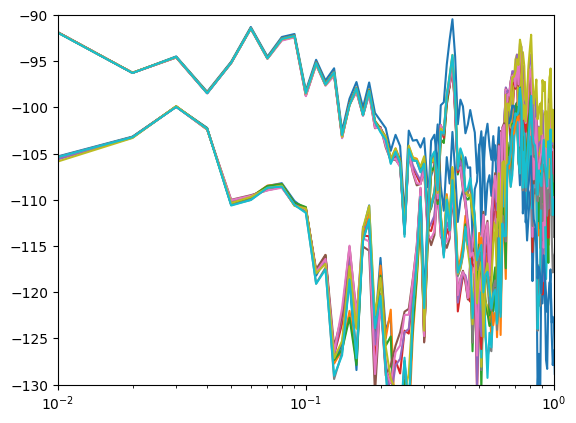

In [9]:
plt.semilogx(data_pre['F'], 10*np.log10(abs(data_pre['TF'])))
plt.semilogx(data_post['F'], 10*np.log10(abs(data_post['TF'])))
plt.xlim([0.01, 1])
plt.ylim([-130, -90])
plt.show()



{'db_name': 'aless\\stoch', 'project_name': 'IEEE39_stoch_CIG', 'grid_name': 'Grid', 'library_name': 'Library', 'user_models_name': 'User Defined Models', 'frame_name': 'TimeVaryingLoadFrame', 'out_of_service': {'ElmGenstat': []}, 'synch_mach': {'G 02': {'typ_id.h': 4.33}, 'G 03': {'typ_id.h': 4.47}, 'G 04': {'typ_id.h': 3.57}, 'G 05': {'typ_id.h': 4.33}, 'G 06': {'typ_id.h': 4.35}, 'G 07': {'typ_id.h': 3.77}, 'G 08': {'typ_id.h': 3.47}, 'G 09': {'typ_id.h': 3.45}, 'G 10': {'typ_id.h': 4.2}, 'G 01': {'typ_id.h': 3.7670682730923692}}, 'CIG': {'VSM Bus 08': {'CM - Power Control VSG 08': {'Ta': 151.8617470306614}}, 'VSM Bus 14': {'CM - Power Control VSG 14': {'Ta': 151.8617470306614}}, 'VSM Bus 27': {'CM - Power Control VSG 27': {'Ta': 151.8617470306614}}}, 'stoch_loads': ['Load 03', 'Load 21'], 'limits': {'P': [5.0, 1000.0], 'Q': [5.0, 1000.0]}, 'sigma': {'P': 0.01, 'Q': 0.0}, 'tau': {'P': 0.02, 'Q': 0.02}, 'record': {'ElmSym': {'names': '*', 'vars': ['s:xspeed'], 'attrs': ['loc_name', '

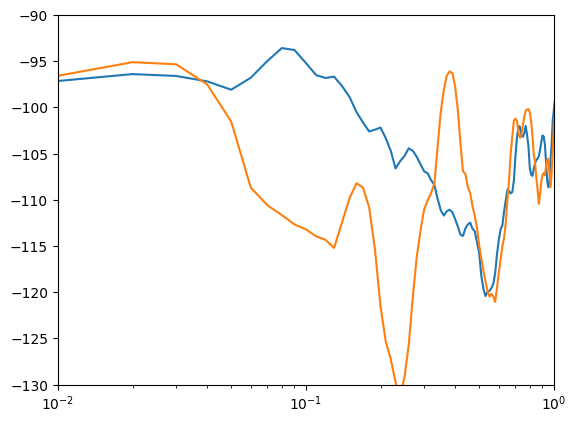

In [23]:
path_pre = "C:\\Users\\aless\\Desktop\\simu_transient\\spettri_hamming_no_step\\simu_110_segment_3_hamming.npz"
path_post = "C:\\Users\\aless\\Desktop\\simu_transient\\spettri_hamming_step\\simu_110_segment_3_hamming.npz"
N=3
m = 2
data_pre = np.load(path_pre, allow_pickle = True)
data_post = np.load(path_post, allow_pickle = True)
print(data_post['config'])
data_pre_smooth = data_pre['TF'][:,1]
data_post_smooth = data_post['TF'][:,1]
for iter in range(m):
    data_pre_smooth = np.convolve(data_pre_smooth, np.ones(N)/N, mode='same')
    data_post_smooth = np.convolve(data_post_smooth, np.ones(N)/N, mode='same')
plt.semilogx(data_pre['F'], 10*np.log10(abs(data_pre_smooth)))
plt.semilogx(data_post['F'], 10*np.log10(abs(data_post_smooth)))
plt.xlim([0.01, 1])
plt.ylim([-130, -90])
plt.show()

In [16]:
data = np.load('C:\\Users\\aless\\Desktop\\simu_transient\\dataset_tran_hamming_blackman_IEEE39_standard.npz', allow_pickle = True)

2459.577033519745


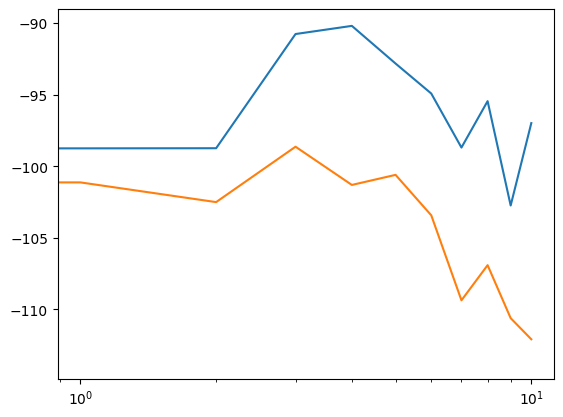

In [18]:
data['TF'].shape
plt.semilogx(10*np.log10(data['TF'][298,0,2,:]))
plt.semilogx(10*np.log10(data['TF'][298,1,2,:]))
print(data['Mtot'][298])

0.9996935351221986
{'db_name': 'aless\\stoch', 'project_name': 'IEEE39_stoch_CIG', 'grid_name': 'Grid', 'library_name': 'Library', 'user_models_name': 'User Defined Models', 'frame_name': 'TimeVaryingLoadFrame', 'out_of_service': {'ElmGenstat': []}, 'synch_mach': {'G 02': {'typ_id.h': 4.33}, 'G 03': {'typ_id.h': 4.47}, 'G 04': {'typ_id.h': 3.57}, 'G 05': {'typ_id.h': 4.33}, 'G 06': {'typ_id.h': 4.35}, 'G 07': {'typ_id.h': 3.77}, 'G 08': {'typ_id.h': 3.47}, 'G 09': {'typ_id.h': 3.45}, 'G 10': {'typ_id.h': 4.2}, 'G 01': {'typ_id.h': 2.1042084168336674}}, 'CIG': {'VSM Bus 08': {'CM - Power Control VSG 08': {'Ta': 0.1}}, 'VSM Bus 14': {'CM - Power Control VSG 14': {'Ta': 0.1}}, 'VSM Bus 27': {'CM - Power Control VSG 27': {'Ta': 0.1}}}, 'stoch_loads': ['Load 03', 'Load 21'], 'limits': {'P': [5.0, 1000.0], 'Q': [5.0, 1000.0]}, 'sigma': {'P': 0.01, 'Q': 0.0}, 'tau': {'P': 0.02, 'Q': 0.02}, 'record': {'ElmSym': {'names': '*', 'vars': ['s:xspeed'], 'attrs': ['loc_name', 'pgini', 'qgini', 'typ_i

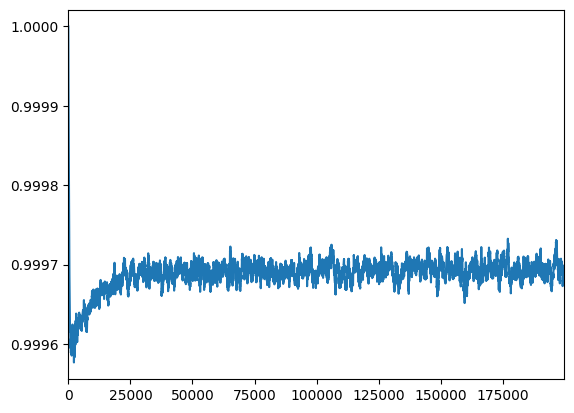

In [5]:
start_stationariety = 200
t_start_tuple = (0, 200, 400, 600) #seconds
segment_time = 200 #sec
window_welch = 100 #sec
fs = 200 #Hz
data = np.load("C:\\Users\\aless\\Desktop\\simu_transient\\simu_no_step\\simu_10\\IEEE39_stoch_CIG_tran.npz", allow_pickle = True)
time_series = data['data'].item()['gen']['s:xspeed'][start_stationariety*fs :, :]
print(data['data'].item()['gen']['s:xspeed'][-1000,1])
time_series = time_series - np.mean(time_series, axis = 0)
plt.xlim([0, 200*999])
plt.plot(data['data'].item()['gen']['s:xspeed'][:,1])
#plt.ylim([data['data'].item()['gen']['s:xspeed'][125000,1]-1e-14, data['data'].item()['gen']['s:xspeed'][125000,1]+1e-14])
print(data['config'])
plt.show()

In [2]:
data_0 = np.load("C:\\Users\\aless\\Desktop\\simu_transient\\simu_no_step\\simu_0\\IEEE39_stoch_CIG_tran.npz", allow_pickle = True)
data_1 = np.load("C:\\Users\\aless\\Desktop\\simu_transient\\simu_no_step\\simu_1\\IEEE39_stoch_CIG_tran.npz", allow_pickle = True)

In [76]:
print(data_0['config'])
print(data_1['config'])

{'db_name': 'aless\\stoch', 'project_name': 'IEEE39_stoch_CIG', 'grid_name': 'Grid', 'library_name': 'Library', 'user_models_name': 'User Defined Models', 'frame_name': 'TimeVaryingLoadFrame', 'out_of_service': {'ElmGenstat': []}, 'synch_mach': {'G 02': {'typ_id.h': 4.33}, 'G 03': {'typ_id.h': 4.47}, 'G 04': {'typ_id.h': 3.57}, 'G 05': {'typ_id.h': 4.33}, 'G 06': {'typ_id.h': 4.35}, 'G 07': {'typ_id.h': 3.77}, 'G 08': {'typ_id.h': 3.47}, 'G 09': {'typ_id.h': 3.45}, 'G 10': {'typ_id.h': 4.2}, 'G 01': {'typ_id.h': 2.0}}, 'CIG': {'VSM Bus 08': {'CM - Power Control VSG 08': {'Ta': 0.1}}, 'VSM Bus 14': {'CM - Power Control VSG 14': {'Ta': 0.1}}, 'VSM Bus 27': {'CM - Power Control VSG 27': {'Ta': 0.1}}}, 'stoch_loads': ['Load 03', 'Load 21'], 'limits': {'P': [5.0, 1000.0], 'Q': [5.0, 1000.0]}, 'sigma': {'P': 0.01, 'Q': 0.0}, 'tau': {'P': 0.02, 'Q': 0.02}, 'record': {'ElmSym': {'names': '*', 'vars': ['s:xspeed'], 'attrs': ['loc_name', 'pgini', 'qgini', 'typ_id.h', 'typ_id.sgn'], 'devs_name': 

In [2]:
data_pre = np.load("C:\\Users\\aless\\Downloads\\dataset_gen9_P_630\\jaco_nogen\\_0.200\\IEEE 39 fake grid forming_AC.npz",allow_pickle = True)
data_post = np.load("C:\\Users\\aless\\Downloads\\dataset_gen9_P_630\\jaco_nogen_step\\_0.200\\IEEE 39 fake grid forming_AC.npz", allow_pickle = True)

In [8]:
list(data_pre.keys())

['config',
 'inertia',
 'energy',
 'momentum',
 'Stot',
 'H',
 'S',
 'J',
 'Psm',
 'Qsm',
 'Psg',
 'Qsg',
 'Pload',
 'Qload',
 'PF_with_slack',
 'PF_without_slack',
 'vars_idx',
 'state_vars',
 'voltages',
 'currents',
 'signals',
 'A',
 'var_names',
 'model_names',
 'omega_col_idx',
 'gen_names',
 'load_buses',
 'bus_equiv_terms',
 'ref_SMs']

In [21]:
data_pre['PF_with_slack'].item()['SMs']['G 09']

{'P': 630.000000018239,
 'Q': -17.57785904471195,
 'ur': 1.025969007586903,
 'ui': -0.033012392675604955,
 'u': 1.0264999866532016,
 'V': 9.778725719686658,
 'Vl': 16.937249779777826,
 'ir': 0.6139692487199295,
 'ii': -0.0026226278424386178,
 'i': 0.6139748500960888,
 'I': 21.483548180523453,
 'phiu': -1.8429585958107644,
 'phii': -0.2447428645450285,
 'cosphi': 0.9996109840735702}

In [3]:
data_clean_pre = np.load('C:\\Users\\aless\\Desktop\\prova_non_param\\IEEE39_stoch_CIG_AC_TF_-3.0_-1.0_100.npz', allow_pickle = True)
data_clean_post= np.load('C:\\Users\\aless\\Desktop\\prova_non_param_step\\IEEE39_stoch_CIG_AC_TF_-3.0_-1.0_100.npz', allow_pickle = True)

(array([188], dtype=int64),)


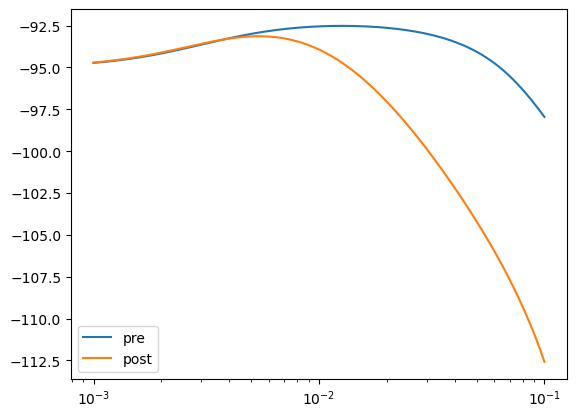

In [4]:
value = np.nonzero(data_clean_post['var_names'] == 'G 08.speed')
print(value)
spettro_pre =  20*np.log10(np.squeeze(abs(data_clean_pre['TF'][0,:, value] + data_clean_pre['TF'][1,:, value])))
spettro_post =  20*np.log10(np.squeeze(abs(data_clean_post['TF'][0,:, value] + data_clean_post['TF'][1,:, value])))
plt.semilogx(data_clean_pre['F'], spettro_pre, label = 'pre')
plt.semilogx(data_clean_post['F'], spettro_post, label = 'post')
plt.legend()

In [6]:
data_pre = np.load("pre salto.npz", allow_pickle = True)
data_post = np.load("post salto.npz", allow_pickle = True)

In [7]:
print('pre salto')
vect_pre = data_pre['data'].item()['gen']['s:xspeed']
time_pre = data_pre['time']
print(vect_pre.shape)
print(time_pre.shape)
print(data_pre['H'])

print('post salto')
vect_post = data_post['data'].item()['gen']['s:xspeed']
time_post = data_post['time']
print(vect_post.shape)
print(time_post.shape)
print(data_post['H'])

pre salto
(1440001, 10)
(1440001,)
{'G 01': 5.0, 'G 02': 4.329999923706055, 'G 03': 4.46999979019165, 'G 04': 3.569999933242798, 'G 05': 4.329999923706055, 'G 06': 4.349999904632568, 'G 07': 3.7700002193450928, 'G 08': 3.4699997901916504, 'G 09': 3.450000047683716, 'G 10': 4.199999809265137}
post salto
(1440001, 10)
(1440001,)
{'G 01': 5.0, 'G 02': 4.329999923706055, 'G 03': 4.46999979019165, 'G 04': 3.569999933242798, 'G 05': 4.329999923706055, 'G 06': 4.349999904632568, 'G 07': 3.7700002193450928, 'G 08': 3.4699997901916504, 'G 09': 3.450000047683716, 'G 10': 4.199999809265137}


c:\Users\aless\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


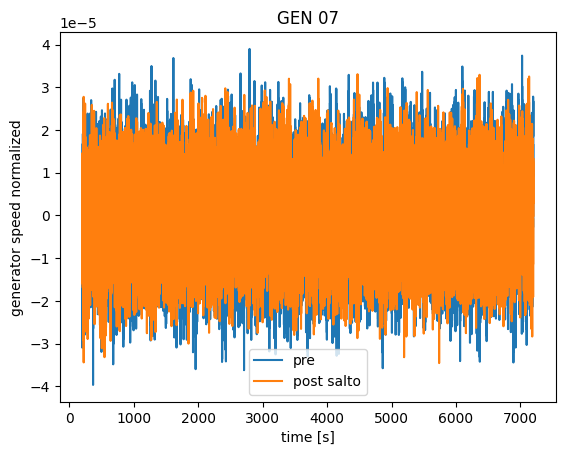

In [17]:
start_statio = 200*200
omega_pre =vect_pre[start_statio:,:] - np.mean(vect_pre[start_statio:,:], axis = 0)
omega_post = vect_post[start_statio:,:] - np.mean(vect_post[start_statio:,:], axis = 0)
time_samples = time_pre[start_statio:]
plt.plot(time_samples, omega_pre[:,7], label = 'pre')
plt.plot(time_samples, omega_post[:,7], label = 'post salto')
# y_list = [1.0001, 1, 0.9999, 0.9998, 0.9997, 0.9996, 0.9995, 0.9994]
# y_labels = [str(y) for y in y_list]
# plt.yticks(y_list, y_labels)
plt.ylabel('generator speed normalized')
plt.title('GEN 07')
plt.xlabel('time [s]')
plt.legend()
plt.show()

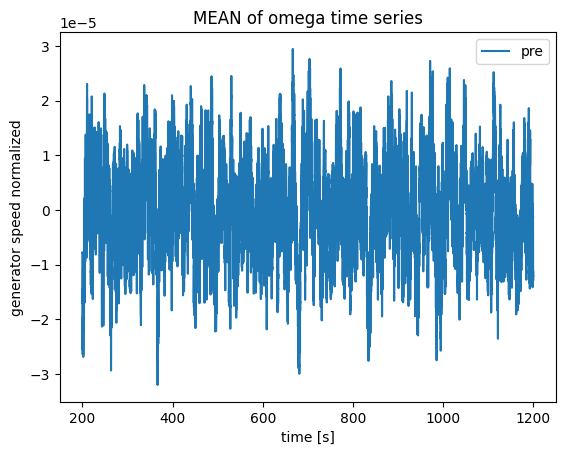

In [30]:
omega_pre_mean= np.mean(omega_pre, axis = 1)
omega_post_mean = np.mean(omega_post, axis = 1)
plt.plot(time_samples[:1000*200], omega_pre_mean[:1000*200], label = 'pre')
plt.ylabel('generator speed normalized')
plt.title('MEAN of omega time series')
plt.xlabel('time [s]')
plt.legend()
plt.show()


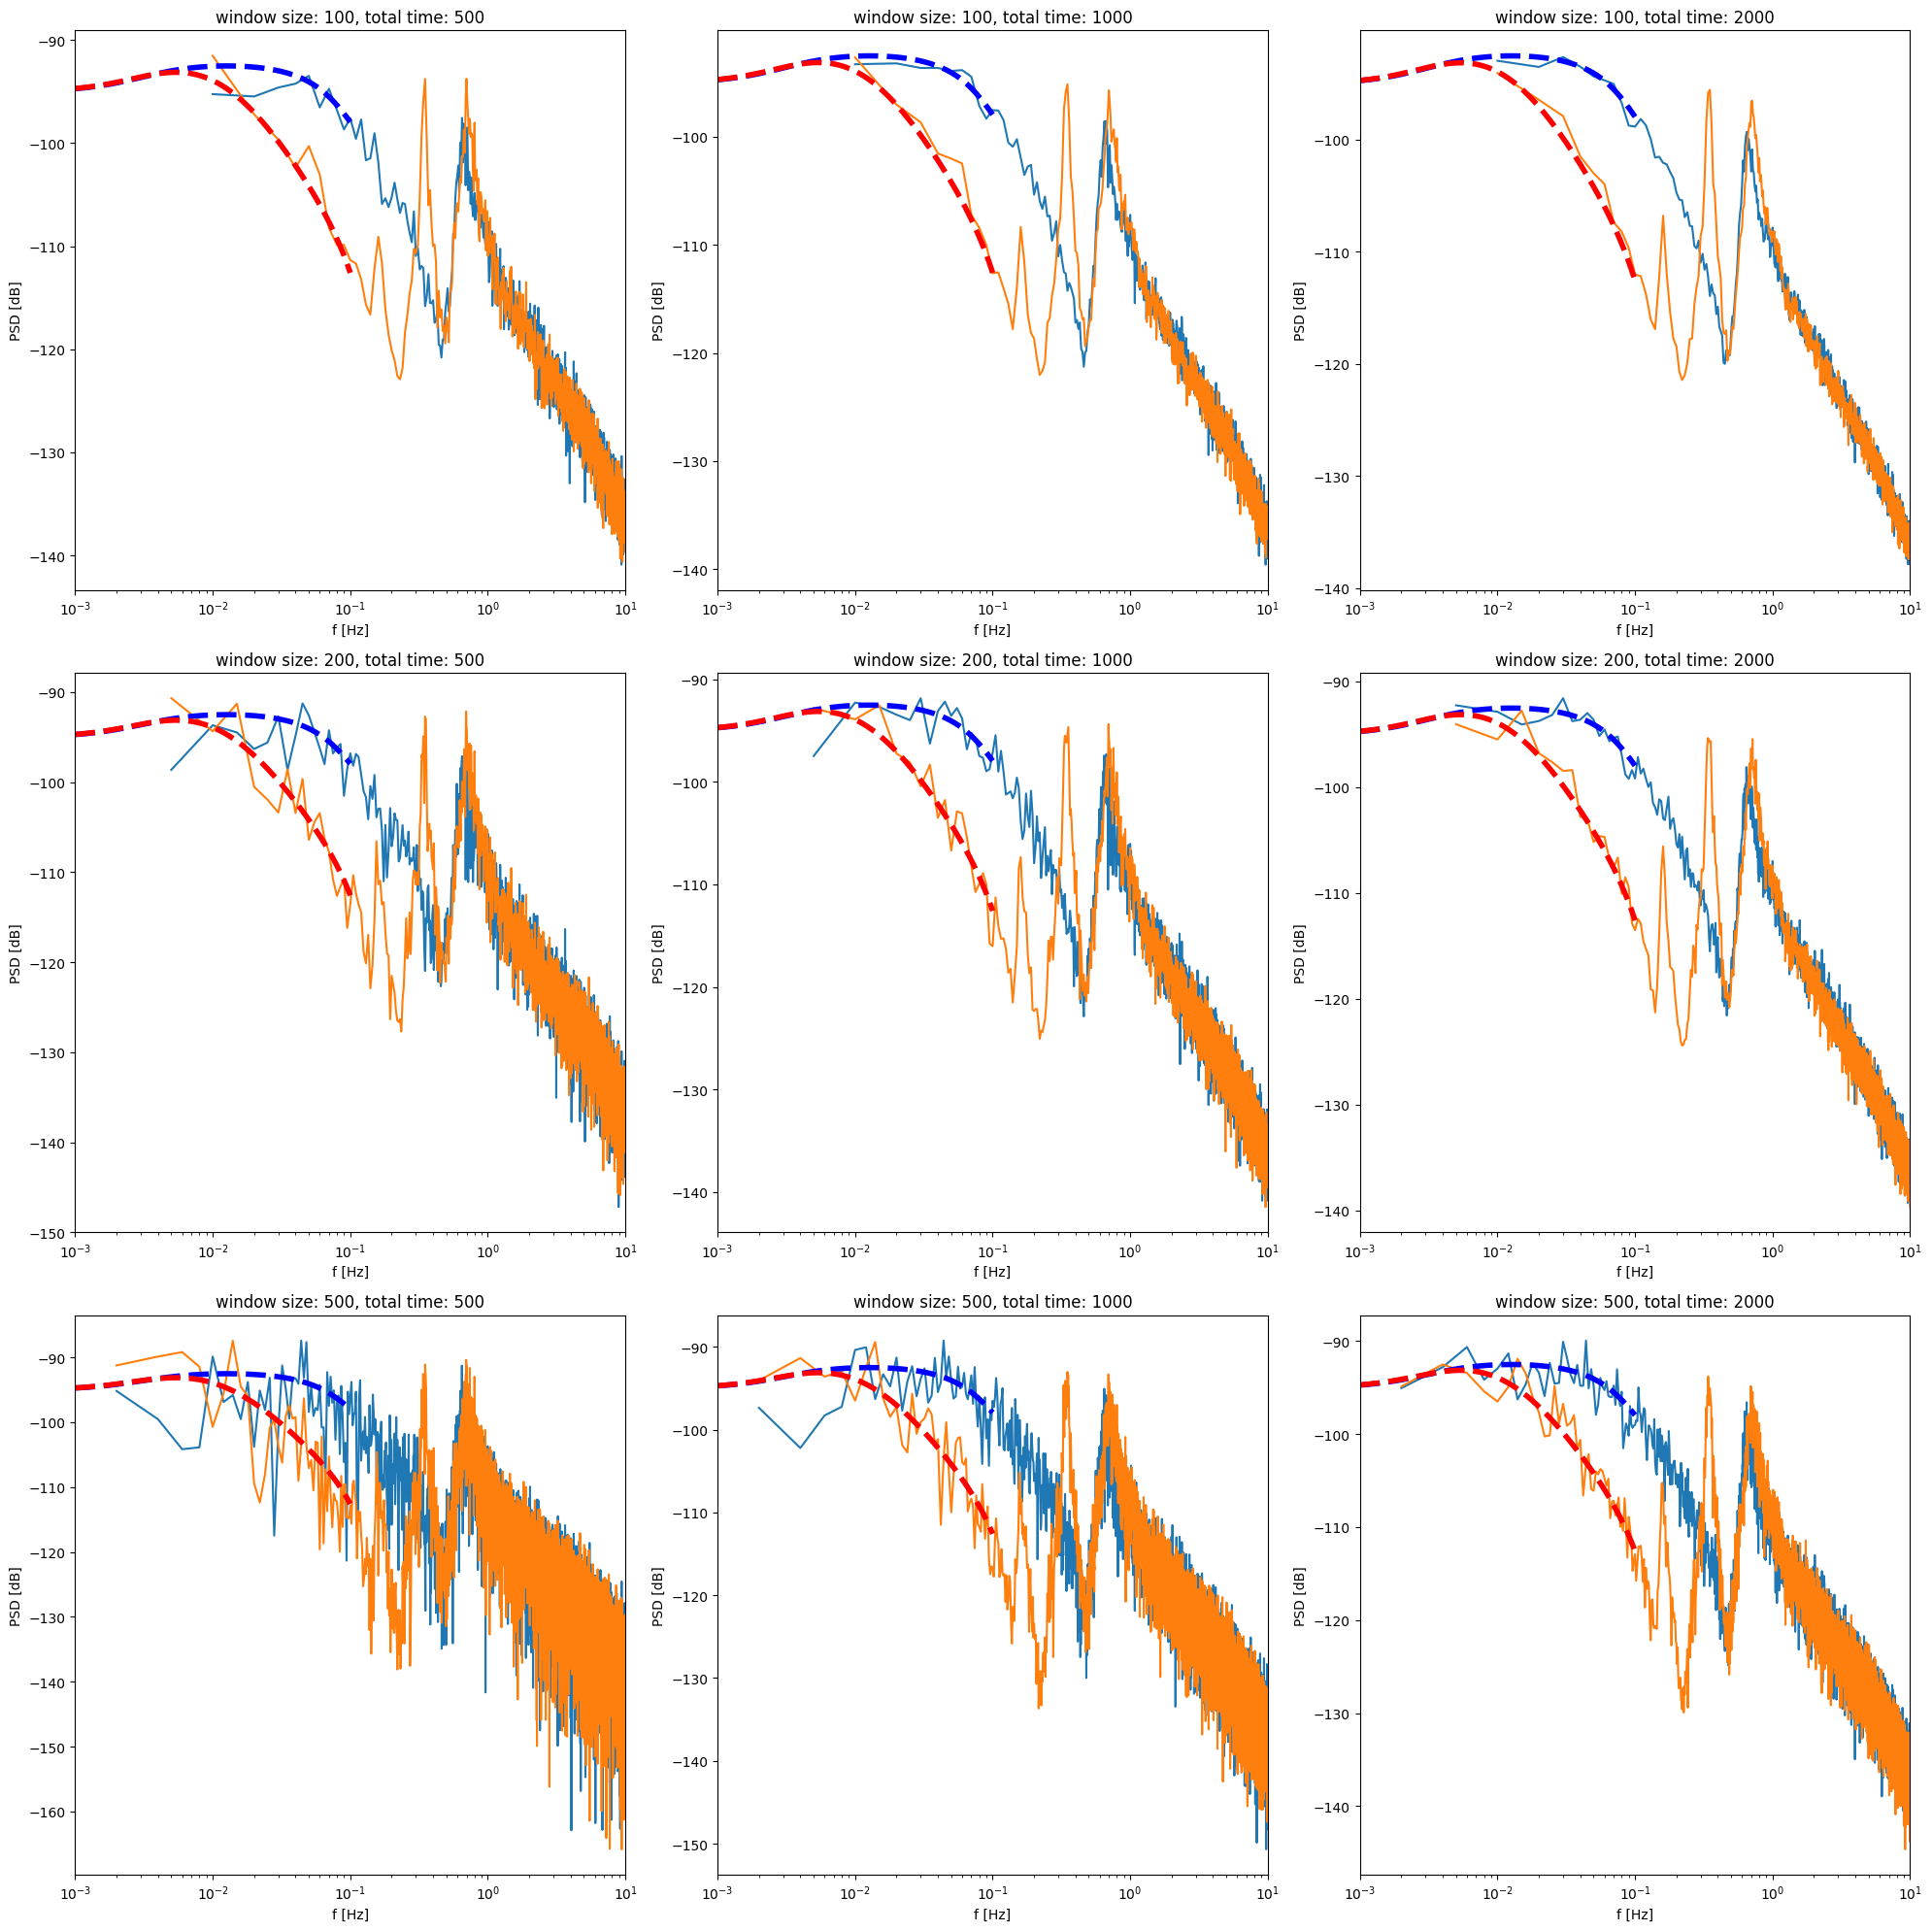

In [32]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))
for i,T in enumerate([100, 200, 500]):
    for j,time in enumerate([500, 1000, 2000]):
        if time >= T:
            (f_pre, Pxx_pre) = welch(omega_pre_mean[:time*200], scaling = 'density', fs = 200, nperseg = 200*T, window = 'boxcar', noverlap =None)
            (f_post, Pxx_post) = welch(omega_post_mean[:time*200], scaling = 'density', fs = 200, nperseg = 200*T, window = 'boxcar', noverlap = None )
            idx = (f_pre<10)
            idx[0] = False
            axs[i,j].semilogx(f_pre[idx], 10*np.log10(Pxx_pre[idx]))
            axs[i,j].semilogx(f_post[idx], 10*np.log10(Pxx_post[idx]))
            axs[i,j].semilogx(data_clean_pre['F'], spettro_pre, ls = '--', lw = 4, color = 'blue')
            axs[i,j].semilogx(data_clean_post['F'], spettro_post, ls = '--', lw = 4, color = 'red')
            axs[i,j].set_title('window size: {}, total time: {}'.format(T, time))
            
for ax in axs.flat:
    ax.set(xlabel='f [Hz]', ylabel='PSD [dB]', xlim = (10**-3, 10))
plt.tight_layout()
plt.show()

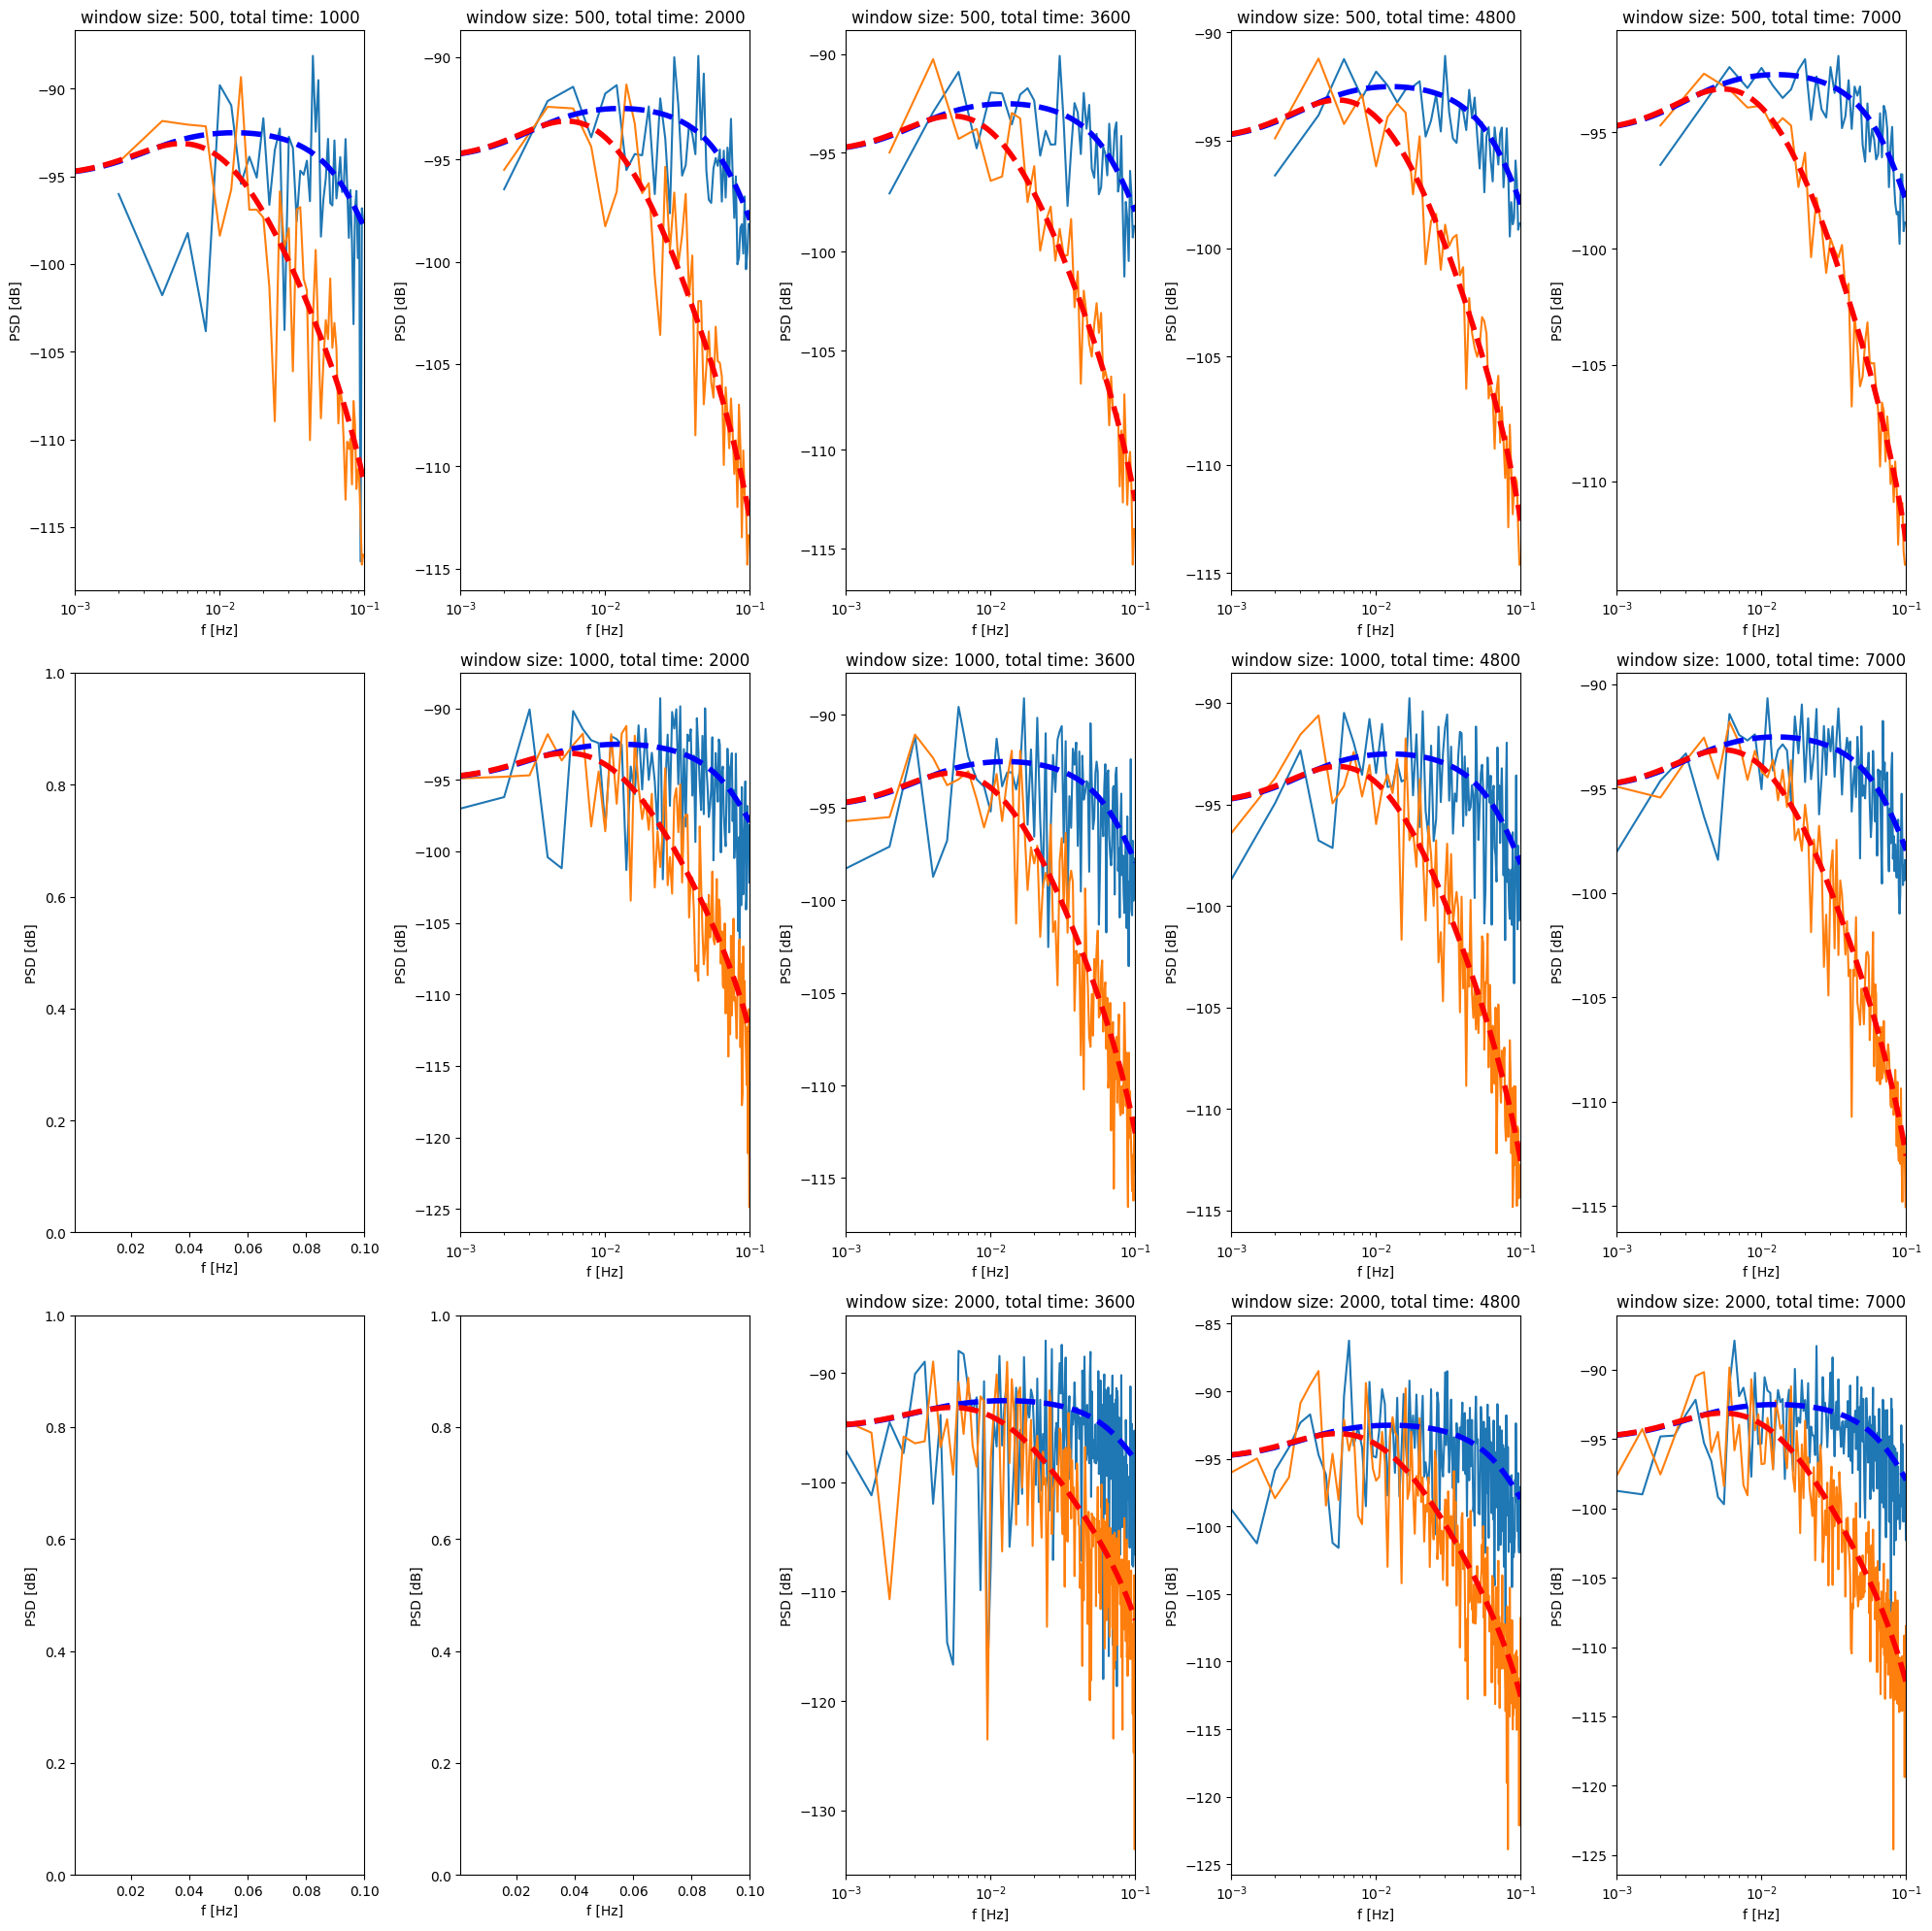

In [11]:
fig, axs = plt.subplots(3, 5, figsize = (20,20))
N = 3
m = 0
for i,T in enumerate([500, 1000, 2000]):
    for j,time in enumerate([1000, 2000, 3600, 4800, 7000]):
        if time > T:
            (f_pre, Pxx_pre) = welch(omega_pre[:time*200,7], scaling = 'density', fs = 200, nperseg = 200*T, window = 'rect', noverlap =0)
            (f_post, Pxx_post) = welch(omega_post[:time*200, 7], scaling = 'density', fs = 200, nperseg = 200*T, window = 'rect', noverlap = 0)
            for iter in range(m):
                Pxx_pre = np.convolve(Pxx_pre, np.ones(N)/N, mode='same')
                Pxx_post = np.convolve(Pxx_post, np.ones(N)/N, mode='same')

            idx = (f_pre<0.1)
            idx[0] = False
            axs[i,j].semilogx(f_pre[idx], 10*np.log10(Pxx_pre[idx]))
            axs[i,j].semilogx(f_post[idx], 10*np.log10(Pxx_post[idx]))
            axs[i,j].semilogx(data_clean_pre['F'], spettro_pre, ls = '--', lw = 4, color = 'blue')
            axs[i,j].semilogx(data_clean_post['F'], spettro_post, ls = '--', lw = 4, color = 'red')
            axs[i,j].set_title('window size: {}, total time: {}'.format(T, time))
            
for ax in axs.flat:
    ax.set(xlabel='f [Hz]', ylabel='PSD [dB]', xlim = (10**-3, 10**-1))
plt.tight_layout()
plt.show()

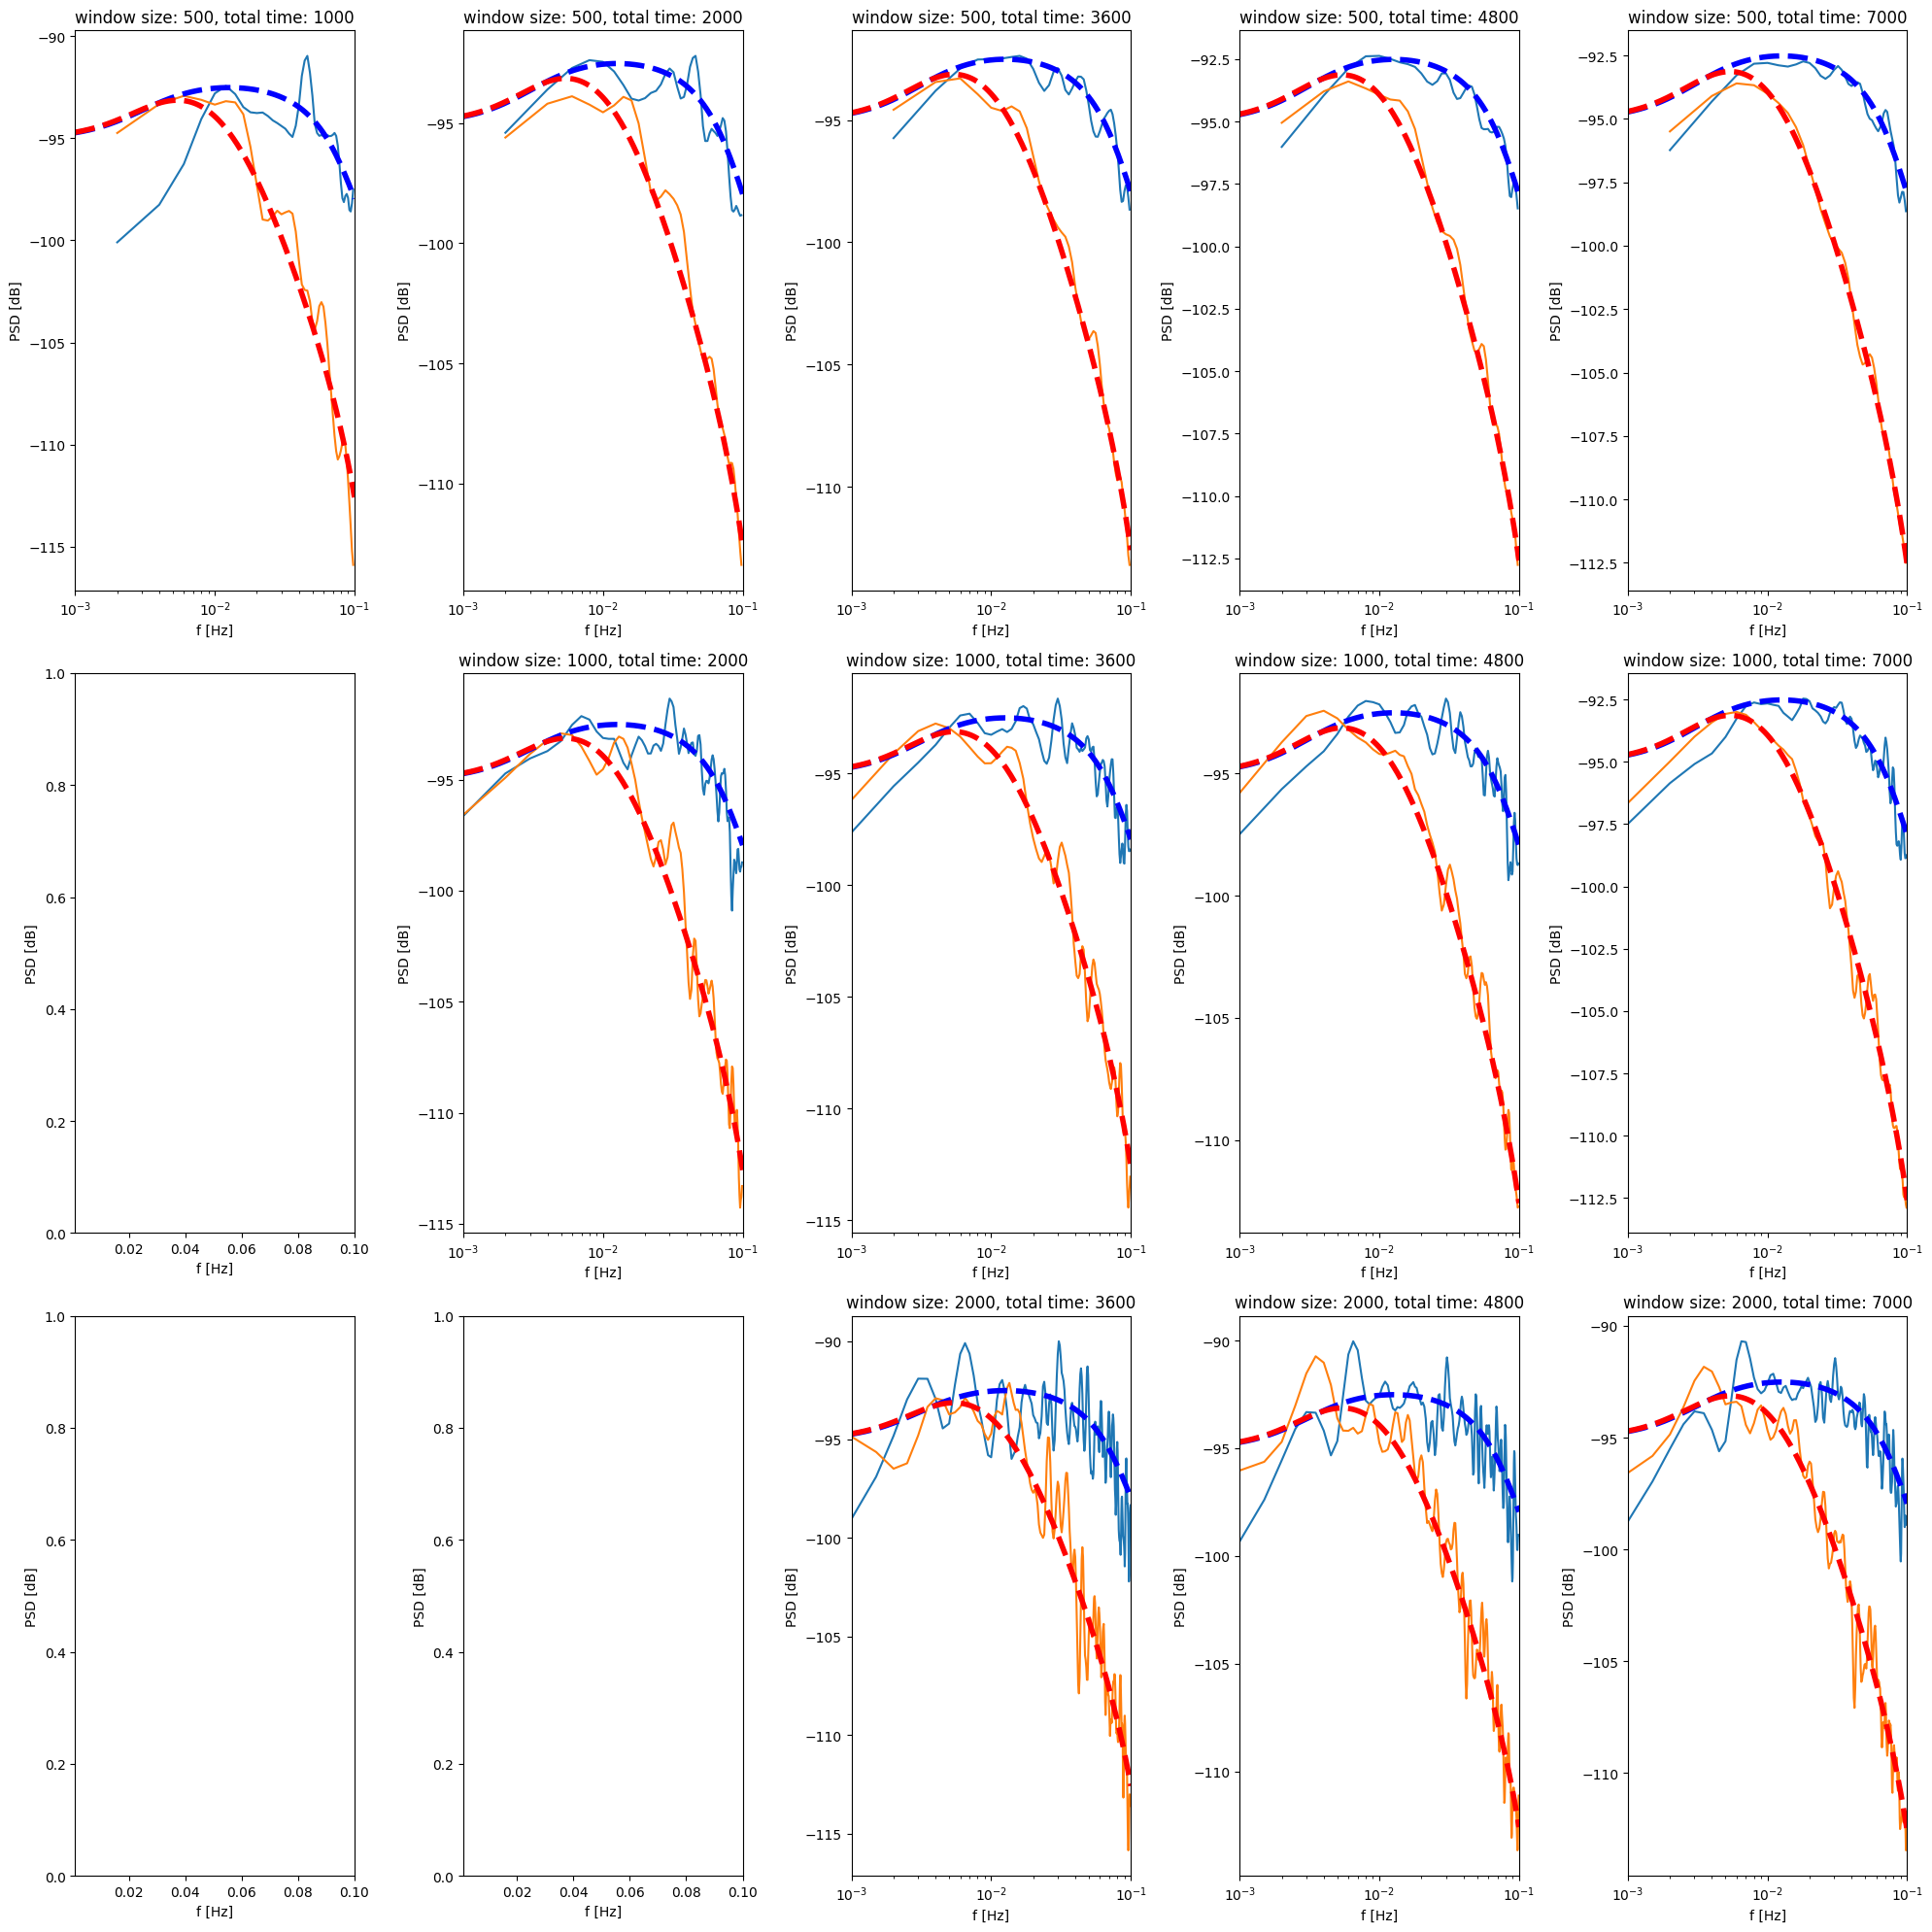

In [12]:
fig, axs = plt.subplots(3, 5, figsize = (20,20))
N = 3
m = 3
for i,T in enumerate([500, 1000, 2000]):
    for j,time in enumerate([1000, 2000, 3600, 4800, 7000]):
        if time > T:
            (f_pre, Pxx_pre) = welch(omega_pre[:time*200,7], scaling = 'density', fs = 200, nperseg = 200*T, window = 'rect', noverlap =0)
            (f_post, Pxx_post) = welch(omega_post[:time*200, 7], scaling = 'density', fs = 200, nperseg = 200*T, window = 'rect', noverlap = 0)
            for iter in range(m):
                Pxx_pre = np.convolve(Pxx_pre, np.ones(N)/N, mode='same')
                Pxx_post = np.convolve(Pxx_post, np.ones(N)/N, mode='same')

            idx = (f_pre<0.1)
            idx[0] = False
            axs[i,j].semilogx(f_pre[idx], 10*np.log10(Pxx_pre[idx]))
            axs[i,j].semilogx(f_post[idx], 10*np.log10(Pxx_post[idx]))
            axs[i,j].semilogx(data_clean_pre['F'], spettro_pre, ls = '--', lw = 4, color = 'blue')
            axs[i,j].semilogx(data_clean_post['F'], spettro_post, ls = '--', lw = 4, color = 'red')
            axs[i,j].set_title('window size: {}, total time: {}'.format(T, time))
            
for ax in axs.flat:
    ax.set(xlabel='f [Hz]', ylabel='PSD [dB]', xlim = (10**-3, 10**-1))
plt.tight_layout()
plt.show()

0.001
0.0010234114021054528


In [8]:
dati_jacobiani_pre = np.load("C:\\Users\\aless\\Desktop\\inertia step simulations\\dataset_no_step.npz", allow_pickle = True)
dati_jacobiani_post = np.load("C:\\Users\\aless\\Desktop\\inertia step simulations\\dataset_step.npz", allow_pickle = True)

In [11]:
F = np.logspace(-3,-1,200)
spettri_jacobiani_pre = dati_jacobiani_pre['TF'][:,7,:]
spettri_jacobiani_post = dati_jacobiani_post['TF'][:,7,:]
picchi_pre = np.argmax(spettri_jacobiani_pre, axis = 1)
picchi_post = np.argmax(spettri_jacobiani_post, axis = 1)

picchi_f_pre = F[picchi_pre]
picchi_f_post = F[picchi_post]
shifts = picchi_f_pre - picchi_f_post



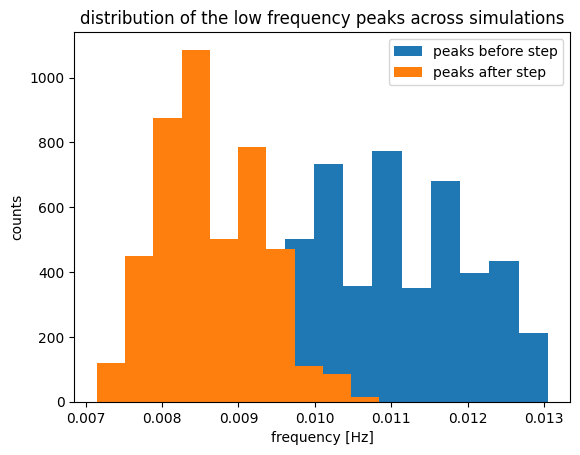

In [32]:
plt.hist(picchi_f_pre, label = 'peaks before step')
plt.hist(picchi_f_post, label = 'peaks after step')
plt.legend()
plt.xlabel("frequency [Hz]")
plt.ylabel("counts")
plt.title("distribution of the low frequency peaks across simulations")
plt.show()

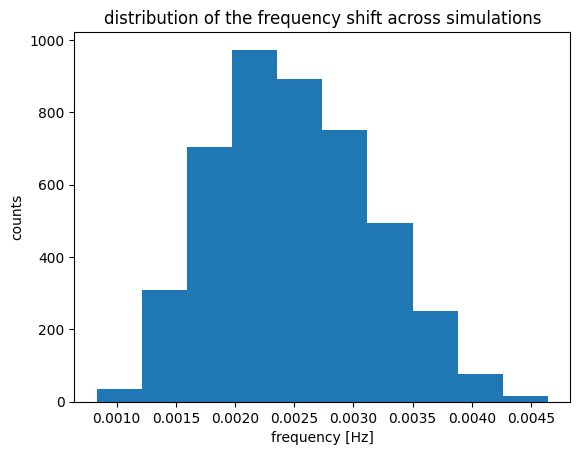

In [39]:
plt.hist(shifts)
plt.xlabel("frequency [Hz]")
plt.ylabel("counts")
plt.title("distribution of the frequency shift across simulations")
plt.show()

In [40]:
print(F[np.min(picchi_post)])
print(F[np.min(picchi_post)+1])
print(np.min(shifts))

0.007149428986597577
0.007316807143427192
0.0008344138610908713


In [68]:

path_folder = "C:\\Users\\aless\\Desktop\\prova_non_param\\config"
list_total = []
time_series = []
names = []
i=0
for file in os.listdir(path_folder):
    if '.npz' in file:
        dato = np.load(os.path.join(path_folder, file), allow_pickle = True)
        print('caricato')
        list_total.append(dato['data'].item()['gen']['s:xspeed'])
        time_series.append(dato['data'].item()['gen']['s:xspeed'][:,1])
        names.append(file)
        print(file)
        print(dato['H'])
        i=i+1


caricato
high_h_base.npz
{'G 01': 10.0, 'G 02': 4.329999923706055, 'G 03': 4.46999979019165, 'G 04': 3.569999933242798, 'G 05': 4.329999923706055, 'G 06': 4.349999904632568, 'G 07': 3.7700002193450928, 'G 08': 3.4699997901916504, 'G 09': 3.450000047683716, 'G 10': 4.199999809265137}
caricato
high_h_high_step.npz
{'G 01': 10.0, 'G 02': 4.329999923706055, 'G 03': 4.46999979019165, 'G 04': 3.569999933242798, 'G 05': 4.329999923706055, 'G 06': 4.349999904632568, 'G 07': 3.7700002193450928, 'G 08': 3.4699997901916504, 'G 09': 3.450000047683716, 'G 10': 4.199999809265137}
caricato
high_h_low_step.npz
{'G 01': 10.0, 'G 02': 4.329999923706055, 'G 03': 4.46999979019165, 'G 04': 3.569999933242798, 'G 05': 4.329999923706055, 'G 06': 4.349999904632568, 'G 07': 3.7700002193450928, 'G 08': 3.4699997901916504, 'G 09': 3.450000047683716, 'G 10': 4.199999809265137}
caricato
high_h_mid_step.npz
{'G 01': 10.0, 'G 02': 4.329999923706055, 'G 03': 4.46999979019165, 'G 04': 3.569999933242798, 'G 05': 4.32999

In [13]:
data_clean_l= np.load("C:\\Users\\aless\\Desktop\\prova_non_param\\config\\jacobiani\low\\IEEE39_stoch_CIG_AC_TF_-3.0_2.0_100.npz", allow_pickle = True)
data_clean_m = np.load("C:\\Users\\aless\\Desktop\\prova_non_param\\config\\jacobiani\mid\\IEEE39_stoch_CIG_AC_TF_-3.0_2.0_100.npz", allow_pickle = True)
data_clean_h = np.load("C:\\Users\\aless\\Desktop\\prova_non_param\\config\\jacobiani\high\\IEEE39_stoch_CIG_AC_TF_-3.0_2.0_100.npz", allow_pickle = True)

data_clean_l_m = np.load("C:\\Users\\aless\\Desktop\\prova_non_param\\config\\jacobiani\low_h_mid_step\\IEEE39_stoch_CIG_AC_TF_-3.0_2.0_100.npz", allow_pickle = True)
data_clean_m_m = np.load("C:\\Users\\aless\\Desktop\\prova_non_param\\config\\jacobiani\mid_h_mid_step\\IEEE39_stoch_CIG_AC_TF_-3.0_2.0_100.npz", allow_pickle = True)
data_clean_h_m = np.load("C:\\Users\\aless\\Desktop\\prova_non_param\\config\\jacobiani\high_h_mid_step\\IEEE39_stoch_CIG_AC_TF_-3.0_2.0_100.npz", allow_pickle = True)
value = np.nonzero(data_clean_l['var_names'] == 'G 08.speed')


spettro_clean_l = 20*np.log10(np.squeeze(abs(data_clean_l['TF'][0,:, value] + data_clean_l['TF'][1,:, value])))
spettro_clean_m = 20*np.log10(np.squeeze(abs(data_clean_m['TF'][0,:, value] + data_clean_m['TF'][1,:, value])))
spettro_clean_h = 20*np.log10(np.squeeze(abs(data_clean_h['TF'][0,:, value] + data_clean_h['TF'][1,:, value])))
spettro_clean_l_m = 20*np.log10(np.squeeze(abs(data_clean_l_m['TF'][0,:, value] + data_clean_l_m['TF'][1,:, value])))
spettro_clean_m_m = 20*np.log10(np.squeeze(abs(data_clean_m_m['TF'][0,:, value] + data_clean_m_m['TF'][1,:, value])))
spettro_clean_h_m = 20*np.log10(np.squeeze(abs(data_clean_h_m['TF'][0,:, value] + data_clean_h_m['TF'][1,:, value])))

668.0865972107374


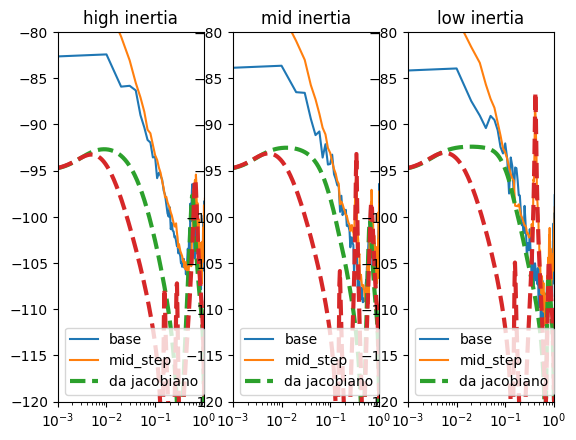

In [119]:
fig, axs = plt.subplots(1,3)
N = 3
m = 0
Pxx_list = []
for serie in time_series:
    (f, Pxx) = welch(serie[150:150+200*1000], scaling = 'density', fs = 200, nperseg = 200*100, window = 'boxcar', noverlap =0)
    for iter in range(m):
        Pxx = np.convolve(Pxx, np.ones(N)/N, mode='same')
    Pxx_list.append(Pxx)

#idx = (f>0) & (f<=100)
idx = f>-1
axs[0].semilogx(f[idx], 10*np.log10(Pxx_list[0][idx]), label = 'base')
#axs[0].semilogx(f[idx], 10*np.log10(Pxx_list[2][idx]), label = 'low_step')
axs[0].semilogx(f[idx], 10*np.log10(Pxx_list[3][idx]), label = 'mid_step')
#axs[0].semilogx(f[idx], 10*np.log10(Pxx_list[1][idx]), label = 'high_step')
axs[0].semilogx(data_clean_h_m['F'], spettro_clean_h, linestyle = '--', label ='da jacobiano', linewidth = 3)
axs[0].semilogx(data_clean_h_m['F'], spettro_clean_h_m, linestyle = '--', linewidth = 3)
axs[0].set_xlim((0.001, 1))
axs[0].set_ylim((-120, -80))
axs[0].set_title('high inertia')
axs[0].legend(loc = 'lower left')

axs[1].semilogx(f[idx], 10*np.log10(Pxx_list[8][idx]), label = 'base')
#axs[1].semilogx(f[idx], 10*np.log10(Pxx_list[10][idx]), label = 'low_step')
axs[1].semilogx(f[idx], 10*np.log10(Pxx_list[11][idx]), label = 'mid_step')
#axs[1].semilogx(f[idx], 10*np.log10(Pxx_list[9][idx]), label = 'high_step')
axs[1].semilogx(data_clean_h_m['F'], spettro_clean_m, linestyle = '--', label ='da jacobiano', linewidth = 3)
axs[1].semilogx(data_clean_h_m['F'], spettro_clean_m_m, linestyle = '--', linewidth = 3)
axs[1].set_xlim((0.001, 1))
axs[1].set_ylim((-120, -80))
axs[1].set_title('mid inertia')
axs[1].legend(loc = 'lower left')

axs[2].semilogx(f[idx], 10*np.log10(Pxx_list[4][idx]), label = 'base')
#axs[2].semilogx(f[idx], 10*np.log10(Pxx_list[6][idx]), label = 'low_step')
axs[2].semilogx(f[idx], 10*np.log10(Pxx_list[7][idx]), label = 'mid_step')
#axs[2].semilogx(f[idx], 10*np.log10(Pxx_list[5][idx]), label = 'high_step')
axs[2].semilogx(data_clean_h_m['F'], spettro_clean_l, linestyle = '--', label ='da jacobiano', linewidth = 3)
axs[2].semilogx(data_clean_h_m['F'], spettro_clean_l_m, linestyle = '--', linewidth = 3)

axs[2].set_xlim((0.001, 1))
axs[2].set_ylim((-120, -80))
axs[2].set_title('low inertia')
axs[2].legend(loc = 'lower left')

#facciamo una stima di quanto lo spettro stimato aderisce a quello calcolato da jacobiano
idx_comparison = (f>=10**-2) & (f < 0.1)
interpolatore = sp.interpolate.interp1d(data_clean_h_m['F'], spettro_clean_m)
spettro_clean_interp = interpolatore(f[idx_comparison])

errore = np.sum((10*np.log10(Pxx_list[11][idx_comparison]) - spettro_clean_interp)**2)
print(errore)

(-150.0, -60.0)

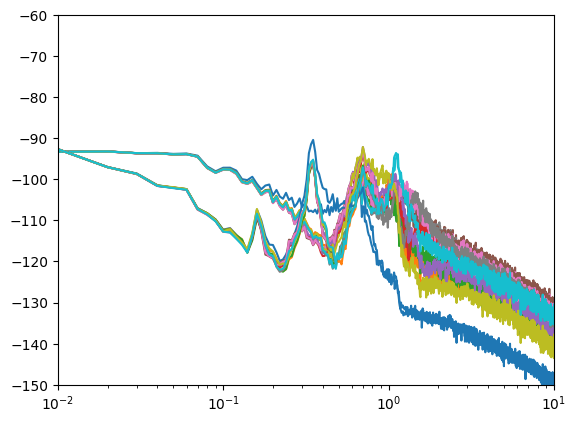

In [117]:
(f_pre, Pxx_pre) = welch(omega_pre[:1000*200,:], axis = 0, scaling = 'density', fs = 200, nperseg = 200*100, window = 'boxcar', noverlap =None)
(f_pre, Pxx_post) = welch(omega_post[:1000*200,:], axis = 0, scaling = 'density', fs = 200, nperseg = 200*100, window = 'boxcar', noverlap =None)
plt.semilogx(f_pre, 10*np.log10(Pxx_pre))
plt.semilogx(f_pre, 10*np.log10(Pxx_post))
plt.xlim(0.01, 10)
plt.ylim(-150, -60)

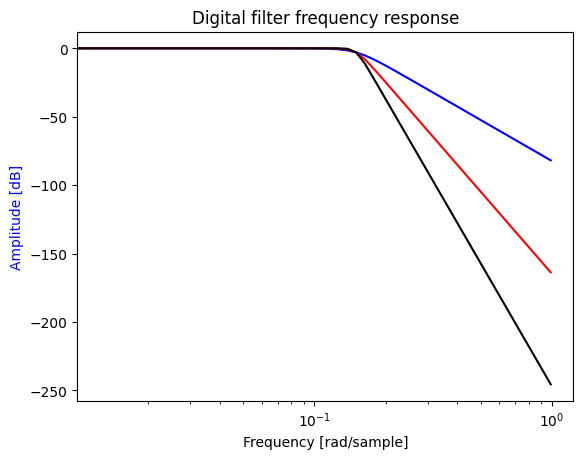

[  -37.48258398   -45.38067119   -52.82770175 ... -1757.29105958
 -1810.11844567 -1900.42744936]


In [47]:
sos1 = sp.signal.butter(5,  fs = 200, Wn = 0.15, output = 'sos')
sos2 = sp.signal.butter(10,  fs = 200, Wn = 0.15, output = 'sos')
sos3 = sp.signal.butter(15,  fs = 200, Wn = 0.15, output = 'sos')
w1, h1 = sp.signal.sosfreqz(sos1,worN = 8000, fs =200)
w2, h2 = sp.signal.sosfreqz(sos2,worN = 8000, fs =200)
w3, h3 = sp.signal.sosfreqz(sos3, worN = 8000, fs =200)
fig, ax1 = plt.subplots()
idx = w1<1
ax1.set_title('Digital filter frequency response')
ax1.semilogx(w1[idx], 20 * np.log10(abs(h1[idx])), 'b')
ax1.semilogx(w2[idx], 20 * np.log10(abs(h2[idx])), 'r')
ax1.semilogx(w3[idx], 20 * np.log10(abs(h3[idx])), 'k')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

plt.show()
print(20 * np.log10(abs(h3[w1>0.19])))

(-120.0, -80.0)

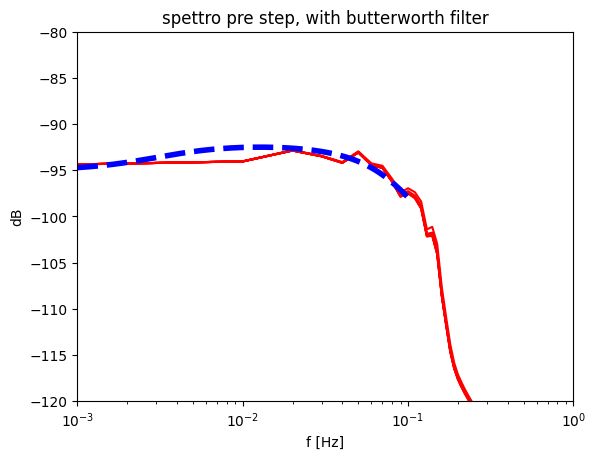

In [57]:
omega_pre_filtered = sp.signal.sosfilt(sos3, omega_pre[:200*1000,:], axis = 0)
(f_pre, Pxx_pre) = welch(omega_pre[:200*1000], axis = 0, scaling = 'density', fs = 200, nperseg = 200*200, window = 'boxcar', noverlap =None)
(f_pre_filt, Pxx_pre_filt) = welch(omega_pre_filtered, axis = 0, scaling = 'density', fs = 200, nperseg = 200*100, window = 'boxcar', noverlap =None)
idx = (f_pre>0.001) & (f_pre <0.1)
plt.semilogx(f_pre_filt, 10*np.log10(Pxx_pre_filt), color='red')
#plt.semilogx(f_pre, 10*np.log10(Pxx_pre), color = 'black')
plt.semilogx(data_clean_pre['F'], spettro_pre, ls = '--', lw = 4, color = 'blue')
plt.title('spettro pre step, with butterworth filter')
plt.xlabel('f [Hz]')
plt.ylabel('dB')
plt.xlim([0.001, 1])
plt.ylim([-120, -80])


(200000, 10)
(400, 10)


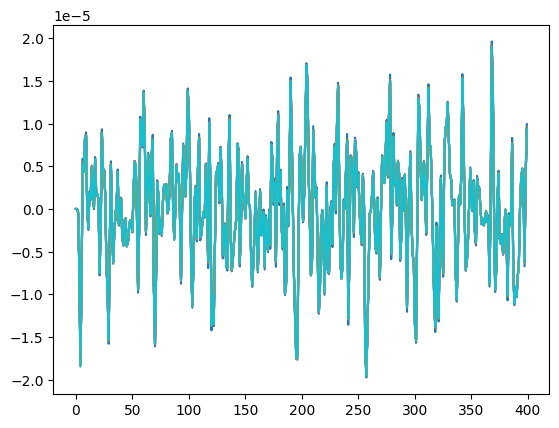

In [70]:
omega_downsample = sp.signal.decimate(omega_pre[:1000*200], 10, ftype = 'iir', axis = 0, zero_phase = False)
omega_downsample = sp.signal.decimate(omega_downsample, 10, ftype = 'iir', axis = 0, zero_phase = False)
omega_downsample = sp.signal.decimate(omega_downsample, 5, ftype = 'iir', axis = 0, zero_phase = False)
print(omega_pre[:1000*200].shape)
print(omega_downsample.shape)
plt.plot(omega_downsample)



(-120.0, -80.0)

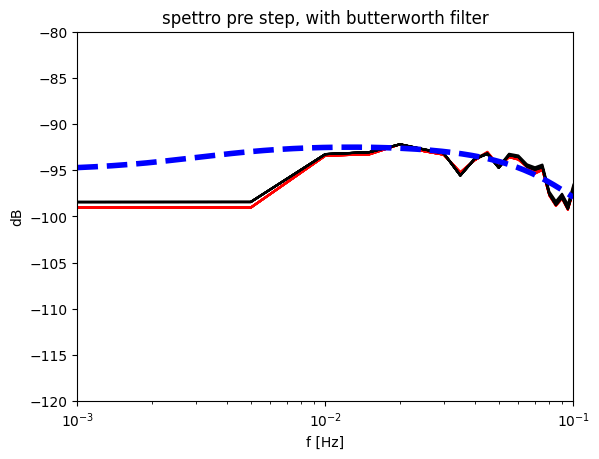

In [74]:
(f_pre, Pxx_pre) = welch(omega_pre[:200*1000], axis = 0, scaling = 'density', fs = 200, nperseg = 200*200, window = 'hamm', noverlap =None)
(f_pre_down, Pxx_pre_down) = welch(omega_downsample, axis = 0, scaling = 'density', fs = 0.4, nperseg = 0.4*200, window = 'hamm', noverlap =None)
idx = (f_pre>0.001) & (f_pre <0.1)
plt.semilogx(f_pre_down, 10*np.log10(Pxx_pre_down), color='red')
plt.semilogx(f_pre, 10*np.log10(Pxx_pre), color = 'black')
plt.semilogx(data_clean_pre['F'], spettro_pre, ls = '--', lw = 4, color = 'blue')
plt.title('spettro pre step, with butterworth filter')
plt.xlabel('f [Hz]')
plt.ylabel('dB')
plt.xlim([0.001, 0.1])
plt.ylim([-120, -80])

In [81]:
#parametric estimation
order = np.arange(1, 30, 1)
ar, rho, coeff_reflection = [spectrum.aryule(omega_downsample[:,7], order = i, norm='biased') for i in order]
aic = spectrum.AIC(len(omega_downsample), rho, order)
plt.plot(order, aic, label='AIC')
print(order[np.argmin(aic)])

ValueError: too many values to unpack (expected 3)

In [3]:
# path_spettri = "C:\\Users\\aless\\Desktop\\prova_non_param\\prova_piccolo_segnale\\spettri"
# data_AC_pre = np.load(os.path.join(path_spettri, 'spettro_AC_pre.npz'), allow_pickle = True)
# data_AC_post = np.load(os.path.join(path_spettri, 'spettro_AC_post.npz'), allow_pickle = True)
# data_small_signal_pre = np.load(os.path.join(path_spettri, 'spettro_small_signal_pre.npz'), allow_pickle = True)
# data_small_signal_post = np.load(os.path.join(path_spettri, 'spettro_small_signal_post.npz'), allow_pickle = True)
data_small_signal_pre = np.load("C:\\Users\\aless\\Downloads\\Per Alessio\\spettri_pre_step\\_0.2000.npz", allow_pickle = True)
data_small_signal_post = np.load("C:\\Users\\aless\Downloads\\Per Alessio\\spettri_post_step\\_0.2000.npz", allow_pickle = True)

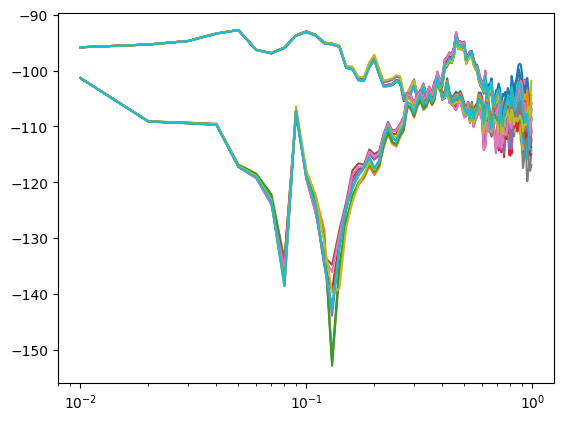

In [14]:

plt.semilogx(data_small_signal_pre['F'], 10*np.log10(np.sum(data_small_signal_pre['TF'], axis = 0) ))
plt.semilogx(data_small_signal_post['F'], 10*np.log10(np.sum(data_small_signal_post['TF'], axis = 0) ))

In [13]:
data_small_signal_pre['F'][1]

0.02

In [6]:
idx_gen = [idx for idx in range(len(data_small_signal_pre['var_names'])) if ('.xspeed' in data_small_signal_pre['var_names'][idx])]

Text(0, 0.5, 'dB')

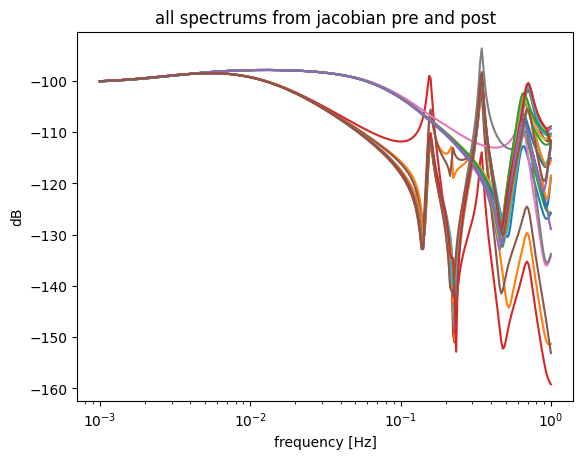

In [10]:
TF_AC_pre = data_AC_pre['TF'][0,:, idx_gen]
TF_AC_post = data_AC_post['TF'][0,:, idx_gen]
for i in range(TF_AC_pre.shape[0]):
    plt.semilogx(data_AC_pre['F'], 20*np.log10(np.abs(TF_AC_pre[i,:])))
    plt.semilogx(data_AC_post['F'], 20*np.log10(np.abs(TF_AC_post[i,:])))
plt.title('all spectrums from jacobian pre and post')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')


In [7]:
TF_small_signal_pre = data_small_signal_pre['TF'][0,:, idx_gen]
TF_small_signal_post = data_small_signal_post['TF'][0,:, idx_gen]
for i in range(TF_small_signal_pre.shape[0]):
    plt.semilogx(data_small_signal_pre['F'], 10*np.log10(np.abs(TF_small_signal_pre[i,:])))
    plt.semilogx(data_small_signal_post['F'], 10*np.log10(np.abs(TF_small_signal_post[i,:])))
plt.title('all spectrums from jacobian pre and post')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')

IndexError: index 618 is out of bounds for axis 2 with size 10

Text(0, 0.5, 'dB')

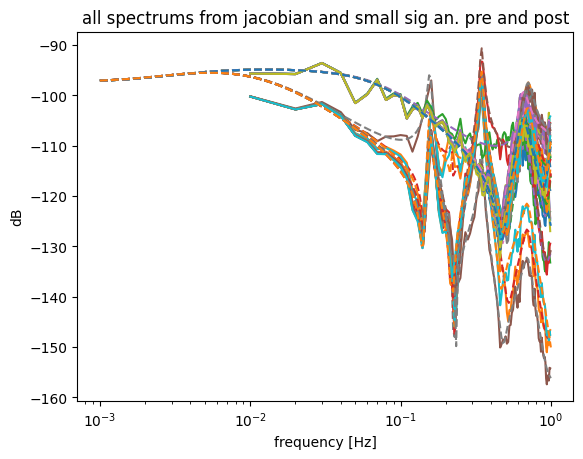

In [12]:
for i in range(TF_small_signal_pre.shape[0]):
    plt.semilogx(data_small_signal_pre['F'], 10*np.log10(np.abs(TF_small_signal_pre[i,:])))
    plt.semilogx(data_small_signal_post['F'], 10*np.log10(np.abs(TF_small_signal_post[i,:])))
    plt.semilogx(data_AC_pre['F'], 10*np.log10( np.square( np.abs( TF_AC_pre[i,:] ) )*2 ), ls = '--')
    plt.semilogx(data_AC_post['F'], 10*np.log10( np.square( np.abs(TF_AC_post[i,:]))*2), ls = '--')
plt.title('all spectrums from jacobian and small sig an. pre and post')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')

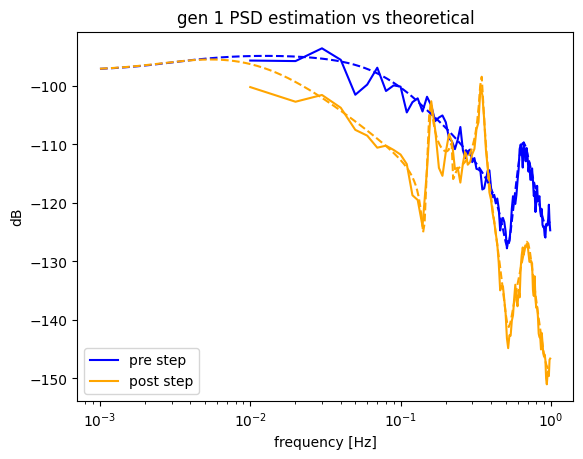

In [21]:
i=0
plt.semilogx(data_small_signal_pre['F'], 10*np.log10(np.abs(TF_small_signal_pre[i,:])), color = 'blue', label = 'pre step')
plt.semilogx(data_small_signal_post['F'], 10*np.log10(np.abs(TF_small_signal_post[i,:])), color = 'orange', label = 'post step')
plt.semilogx(data_AC_pre['F'], 10*np.log10( np.square( np.abs( TF_AC_pre[i,:] ) )*2 ), ls = '--', color = 'blue')
plt.semilogx(data_AC_post['F'], 10*np.log10( np.square( np.abs(TF_AC_post[i,:]))*2), ls = '--', color = 'orange')
plt.title('gen 1 PSD estimation vs theoretical')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
plt.legend()

Text(0, 0.5, 'dB')

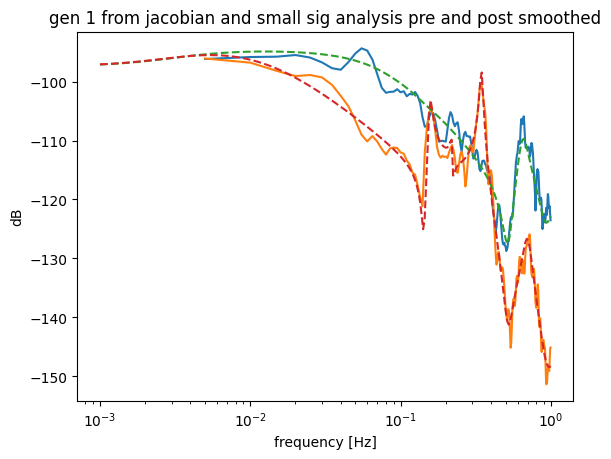

In [15]:
M = 2
N = 3
i=0
kernel = np.ones(N)/N
TF_small_signal_pre_smooth =  TF_small_signal_pre[i,:]
TF_small_signal_post_smooth =  TF_small_signal_post[i,:]
for iter in range(M):
    TF_small_signal_pre_smooth = np.pad(TF_small_signal_pre_smooth, (1,1), mode = 'reflect')
    TF_small_signal_post_smooth = np.pad(TF_small_signal_post_smooth, (1,1), mode = 'reflect')
    TF_small_signal_pre_smooth = np.convolve(TF_small_signal_pre_smooth, kernel, mode = 'valid')
    TF_small_signal_post_smooth = np.convolve(TF_small_signal_post_smooth, kernel, mode = 'valid')

plt.semilogx(data_small_signal_pre['F'], 10*np.log10(np.abs(TF_small_signal_pre_smooth)))
plt.semilogx(data_small_signal_post['F'], 10*np.log10(np.abs(TF_small_signal_post_smooth)))
plt.semilogx(data_AC_pre['F'], 10*np.log10(np.square(np.abs(TF_AC_pre[i,:]))*2), ls = '--')
plt.semilogx(data_AC_post['F'], 10*np.log10(np.square(np.abs(TF_AC_post[i,:]))*2), ls = '--')
plt.title('gen 1 from jacobian and small sig analysis pre and post smoothed')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')

In [3]:
path = "C:\\Users\\aless\\Desktop\\simu_transient\\jacobiani_matteo\\0.2495.npz"
data_spettri = np.load(path, allow_pickle = True)

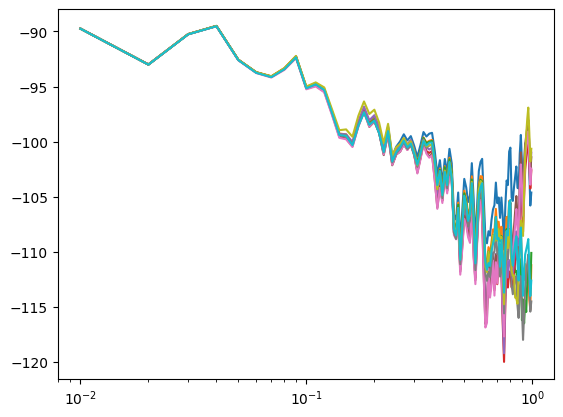

In [7]:
spettri = np.sum(data_spettri['TF'], axis = 0)
plt.semilogx(data_spettri['F'], 10*np.log10(spettri))
